# Análise de dados do Iris

## Introdução

Neste notebook, vamos explorar os dados do Iris, um conjunto de dados clássico que é frequentemente usado para ilustrar técnicas de aprendizado de máquina.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## Carregando o dataset do scikit-learn e mostrando as chaves

In [4]:
dataset = load_iris()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### Mostrando a descrição do dataset

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Criando o DataFrame

In [6]:
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

## Adicionando uma coluna com a espécie de cada flor (o nosso alvo/target)
## Usamos os 'target_names' para obter os nomes em vez dos números 0, 1, 2

In [7]:
df['species'] = pd.Categorical.from_codes(dataset.target, dataset.target_names)

### Primeiras inspeções

In [8]:
# primeiras linhas
print(df.head())
# informações gerais
print(df.info())
# estatísticas descritivas
print(df.describe())
# contagem de valores únicos
print(df['species'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes

### Gráfico de pares (pair plot)

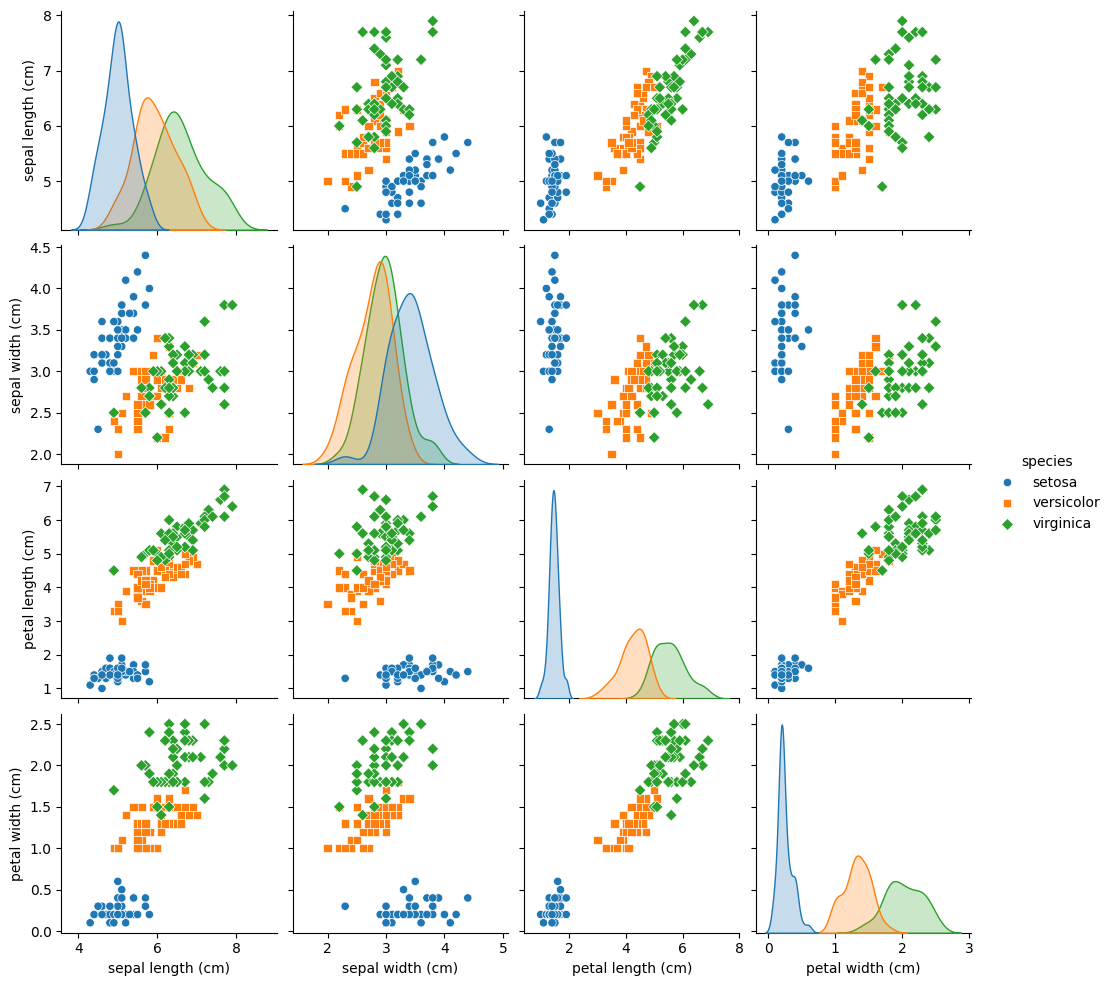

In [9]:
# pair plot cria uma matriz de gráficos de dispersão
# 'hue="species"' cria uma coluna de cores para cada espécie
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
# Exibe o gráfico
plt.show()

## Separando features e alvo
*X* será a nossa matriz com as características. *y* será o nosso alvo

In [10]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']
print("### Formato de feature ###")
print(X.shape)
print("### Formato de target ###")
print(y.shape)

### Formato de feature ###
(150, 4)
### Formato de target ###
(150,)


## Dividindo dados de teste
`test_size=0.3` diz que queremos 30% dos dados pra teste  
`random_state=42` garante que a divisão seja sempre a mesma, para que possamos reproduzir os resultados  
`stratify=y` garante que a proporção de cada espécie seja a mesma nos dados de treino e teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("### Divisão de dados ###")
print(f"Tamanho do conjunto de treino:", {X_train.shape})
print(f"Tamanho do conjunto de teste:", {X_test.shape})

### Divisão de dados ###
Tamanho do conjunto de treino: {(105, 4)}
Tamanho do conjunto de teste: {(45, 4)}


## Criando e treinando o modelo KNN (K-Nearest Neighbors)
Criaremos uma instância do classificador. Usaremos 3 vizinhos (k=3)  
Vamos treinar o modelo usando os dados de treino


In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


### Fazendo as previsões
Vamos entregar as características das 45 flores de teste para o nosso modelo e pedir para ele classificar a qual espécie cada uma pertence. Usaremos o modelo `.predict()`

In [13]:
y_pred = knn.predict(X_test)
print("### Previsões do modelo para o conjunto de teste ###")
print(y_pred)

# Comparando as previsões com os valores reais
print("### Valores reais do conjunto de teste ###")
print(y_test.values)

### Previsões do modelo para o conjunto de teste ###
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa']
### Valores reais do conjunto de teste ###
['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor', ..., 'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa']
Length: 45
Categories (3, object): ['setosa', 'versicolor', 'virginica']


# Avaliando a performance
Vamos utilizar algumas maneiras para medir a performance. Começaremos com a **Acurácia**

### Acurácia
Acurácia é a porcentagem de acertos em relação ao total de previsões  
(Acurácia = Número de acertos / Número total de amostras)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.4f}")
print(f"Isso significa que o modelo acertou {accuracy:.2%} das previsões no conjunto de teste.")


Acurácia do modelo: 1.0000
Isso significa que o modelo acertou 100.00% das previsões no conjunto de teste.


### Matriz de confusão
Para ter uma visão mais detalhada de onde tivemos acertos e erros, usaremos a **Matriz de Confusão**  
- Linhas representam a classe verdadeira  
- Colunas representam a classe prevista no modelo  
- Os números na diagonal principal são os acertos
- Qualquer número fora da diagonal representa um erro de classificação

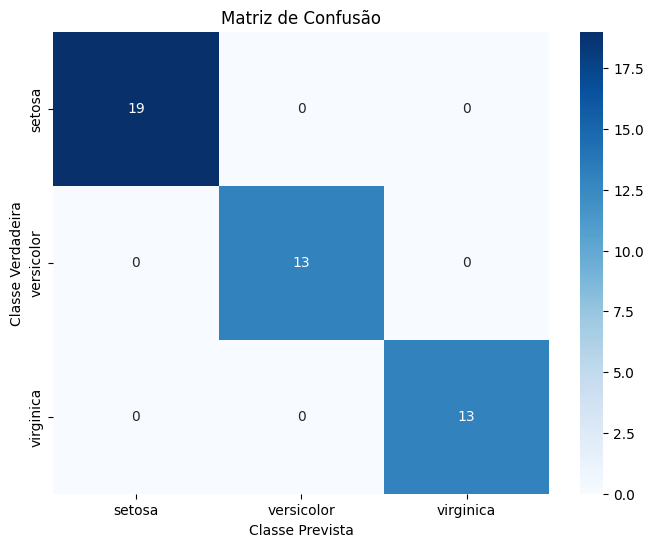

In [15]:
# Gerar matriz
cm = confusion_matrix(y_test, y_pred)

# Plotar matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.show()

# Testes

### Inserindo dados manualmente

In [16]:

# Exemplo de duas flores
two_flower = [[5.0, 3.5, 1.3, 0.3], [6.0, 2.2, 4.0, 1.0]]  
predicted_species_two = knn.predict(two_flower)
print(f"As flores com medidas {two_flower} foram classificadas como: {predicted_species_two}")


# Exemplo com dataframe
data_twoflower = pd.DataFrame(two_flower, columns=dataset.feature_names)
predicted_species_df = knn.predict(data_twoflower)
print("As previsões para o DataFrame são: ", predicted_species_df)

As flores com medidas [[5.0, 3.5, 1.3, 0.3], [6.0, 2.2, 4.0, 1.0]] foram classificadas como: ['setosa' 'versicolor']
As previsões para o DataFrame são:  ['setosa' 'versicolor']


/home/lucas/Documentos/Projetos/classificador-iris/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Testando o KNN
Iremos passar uma lista de valores com a intenção de testar a acurácia do "número de vizinhos" (k)

In [17]:
k_values = [1, 3, 5, 7, 9, 11]
print("### Testando diferentes valores de k ###")
for k in k_values:
    knn_tuned = KNeighborsClassifier(n_neighbors=k)
    knn_tuned.fit(X_train, y_train)
    y_pred = knn_tuned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Resultado para k = {k:2d}: Acurácia = ({accuracy:.2%})")

### Testando diferentes valores de k ###
Resultado para k =  1: Acurácia = (100.00%)
Resultado para k =  3: Acurácia = (100.00%)
Resultado para k =  5: Acurácia = (100.00%)
Resultado para k =  7: Acurácia = (100.00%)
Resultado para k =  9: Acurácia = (100.00%)
Resultado para k = 11: Acurácia = (100.00%)


### Testando árvore de decisão
Vamos usar agora a árvore de decisão para ver se conseguimos melhorar a acuracia  
Pense nela como um fluxograma de perguntas "se\então" que o modelo cria sozinho para classificar as flores

In [18]:
print("### Treinando um modelo de árvore de decisão ###")
# Criando o modelo. O random_state garante que o resultado seja sempre o mesmo
tree_model = DecisionTreeClassifier(random_state = 42)
# Treinando o modelo com os dados de antes
tree_model.fit(X_train, y_train)
# Faz as previsões
y_pred_tree = tree_model.predict(X_test)
# Calculando a acurácia
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia do modelo de árvore de decisão: {accuracy_tree:.2%}")

### Treinando um modelo de árvore de decisão ###
Acurácia do modelo de árvore de decisão: 100.00%


### Visualizando a árvore de decisão  


| Visual         | Significado                                      |
|--------------------|-------------------------------------------------------|
| Cor             | Classe que está ganhando                        |
| Cor forte  | Vitória esmagadora                         |
| Cor fraca            | Vitória fraca/apertada           |
| Intensidade | O quão convincente é essa vitória |  


Visualizando a árvore de decisão


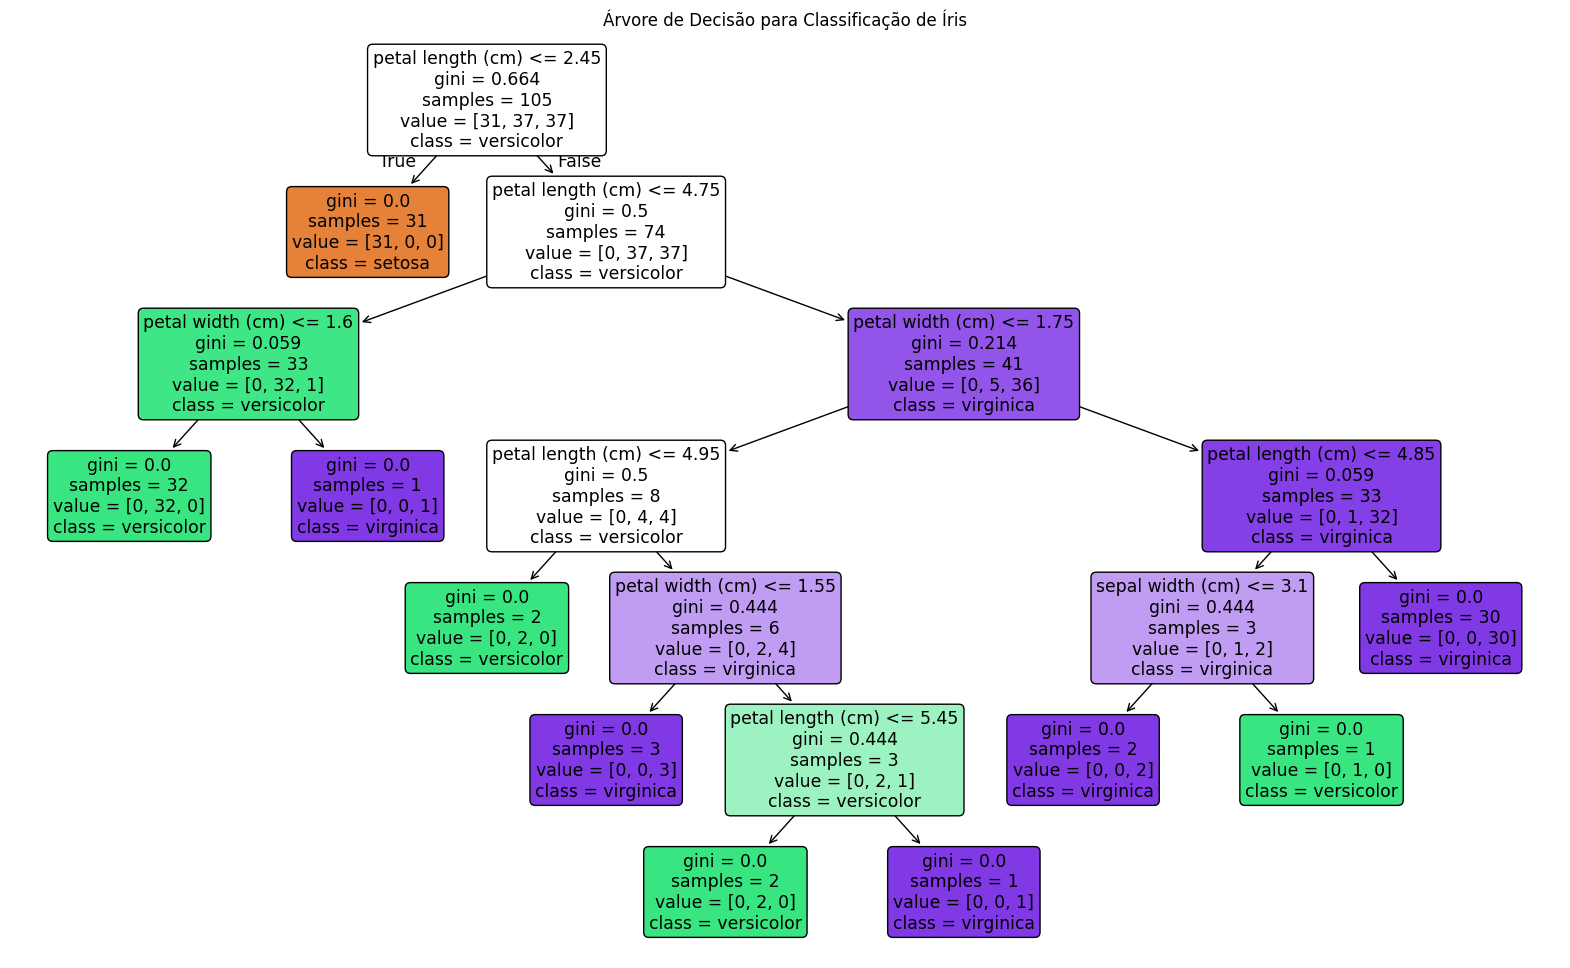

In [19]:
print("Visualizando a árvore de decisão")
plt.figure(figsize=(20, 12))
plot_tree(tree_model, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True,rounded=True)
plt.title("Árvore de Decisão para Classificação de Íris")
plt.show()

### Mostrando a importância das features
Aqui veremos quais das características foram mais importantes no processo de tomada de decisão

### Importância de cada caracteriśtica ###
             Feature  Importance
2  petal length (cm)    0.893264
3   petal width (cm)    0.087626
1   sepal width (cm)    0.019110
0  sepal length (cm)    0.000000


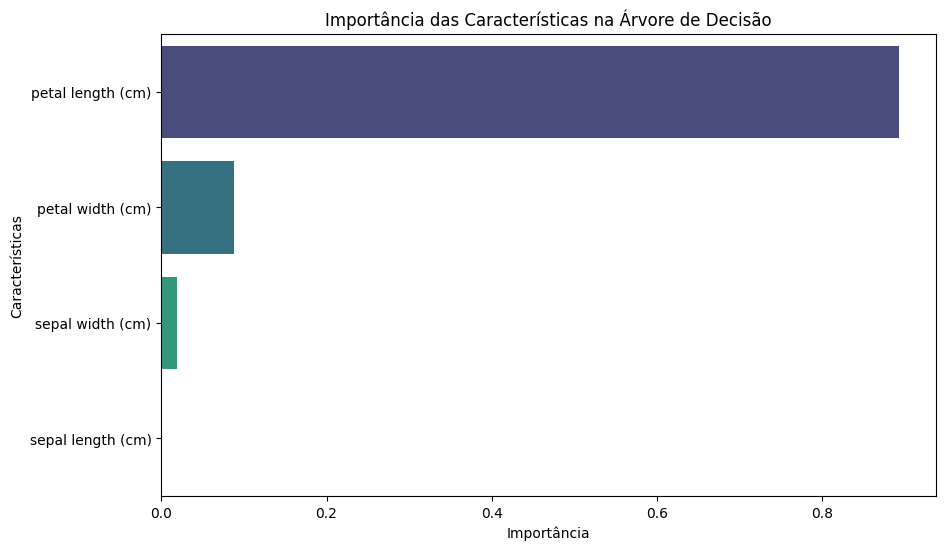

In [20]:
importance = tree_model.feature_importances_
name_features = dataset.feature_names
# DataFrame para armazenar a importância das features
importance_df = pd.DataFrame({'Feature': name_features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("### Importância de cada caracteriśtica ###")
print(importance_df)
# Visualizando a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Importância das Características na Árvore de Decisão')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

### Validação cruzada

In [21]:
from sklearn.model_selection import cross_val_score
print("### Validação cruzada ###")
# Realizando validação cruzada com 5 folds
cv_scores = cross_val_score(tree_model, X, y, cv=5)
print("### Resultados da validação cruzada (5 rodadas)###")
print(f"Acurácia por rodada: {cv_scores}")
print(f"Acurácia média: {cv_scores.mean():.2%}")
print(f"Desvio padrão: {cv_scores.std():.4%}")

### Validação cruzada ###
### Resultados da validação cruzada (5 rodadas)###
Acurácia por rodada: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Acurácia média: 95.33%
Desvio padrão: 3.3993%


## Salvando modelo

In [22]:
import joblib
# Salvando o modelo treinado
joblib.dump(tree_model, 'iris_tree_model.pkl')
print("Modelo treinado salvo como 'iris_tree_model.pkl'")

# Carregando o modelo salvo
loaded_model = joblib.load('iris_tree_model.pkl')

# POdemos usar o modelo carregado para fazer previsões
myst_flower_loaded = [[8.3, 3.2, 5.9, 2.3]]  # Exemplo de flor
df_myst_flower_loaded = pd.DataFrame(myst_flower_loaded, columns=dataset.feature_names)
predicted_species_loaded = loaded_model.predict(df_myst_flower_loaded)
print(f"A flor com medidas {myst_flower_loaded} foi classificada como: {predicted_species_loaded[0]}")

Modelo treinado salvo como 'iris_tree_model.pkl'
A flor com medidas [[8.3, 3.2, 5.9, 2.3]] foi classificada como: virginica
